## 📘 Cvičenie 8: Deskriptívne metódy DM 

# ZHLUKOVANIE
Zhlukovanie (clustering) je **deskriptívna metóda dolovania dát (modelovania)**, ktorej cieľom je rozdeliť objekty do skupín (tzv. **zhlukov/klastrov**) tak, aby si boli objekty **v rámci jednej skupiny čo najpodobnejšie** a zároveň **odlišné od objektov v iných skupinách**.  Ide o nekontrolovaný typ učenia, čo v preklade znamená, že vstupné dáta nemajú informáciu o rozdelení do tried a samotný algoritmus sa snaží navrhnúť rozdelenie do tried (zhlukov).

👉 Reminder: 
- pri **klasifikácii** už dopredu poznáme triedu (napr. „schválená“ vs. „zamietnutá“ žiadosť),  
- pri **zhlukovaní** kategórie **nepoznáme** – snažíme sa ich  **objaviť na základe dát**.  

---

### 🎓 Príklad  
Predstav si, že máš databázu zákazníkov e-shopu:  
- zákazník A: kupuje hlavne lacnejšie veci, objednáva často, nízka suma na objednávku  
- zákazník B: nakupuje zriedkavo, ale kupuje drahé produkty  
- zákazník C: kupuje stredne drahé produkty, objednáva pravidelne  

Ak tieto dáta zanalyzujeme, algoritmus zhlukovania by mohol automaticky vytvoriť **3 skupiny zákazníkov** podľa ich nákupného správania.  
Takto získané skupiny môžeme ďalej využiť napríklad pri **cielenom marketingu** alebo pri návrhu **zľavových kampaní**.  

V rámci zhlukovania na tomto cvičení sa zameriame na algoritmy:
- **K-means** (algoritmus založený na vzdialenosti od centroidov),  
- **Hierarchické zhlukovanie** (postupné spájanie alebo delenie skupín na základe podobnosti).  


## K-means zhlukovanie

K-means je **jeden z najpopulárnejších algoritmov zhlukovania**, ktorý sa snaží rozdeliť dáta do **K zhlukov**  na základe podobnosti.  
Každý zhluk je reprezentovaný **centroidom** – stredom skupiny, ktorý sa vypočíta ako priemer všetkých bodov patriacich do daného zhluku.

👉 Ako K-Means funguje:  
1. Inicializácia zhlukov - Vyberie sa počet zhlukov **K** (napr. 2 alebo 3).  
2. Algoritmus náhodne zvolí počiatočné centroidy.  
3. Každý bod sa priradí k najbližšiemu centroidu v zmysle minimálnej vzdialenosti alebo maximálnej podobnosti.   
4. Vypočítajú sa nové centroidy.  
5. Kroky 3–4 sa opakujú, kým sa centroidy „ustália“, respektíve keď sa splní ukončovacia podmienka. (Bol dosiahnutý daný počet iterácií alebo keď je chybová funkcia menšia ako zvolený prah)

## 🌀 Praktická implementácia algoritmu K-Means


- Algoritmus **K-Means** patrí medzi metódy **učenia bez učiteľa (unsupervised learning)**.  
Jeho cieľom je **rozdeliť dáta do `k` klastrov (zhlukov)** tak, aby si boli prvky v rámci jedného klastru čo najviac podobné a medzi klastrami/zhlukmi čo najviac odlišné.  
Nasledujúce body ťa prevedú praktickou implementáciou tohto algoritmu v jazyku Python tak sa sústreď, pýtaj sa a spúšťaj kód.
---

### 1️⃣ Načítanie datasetu Iris

Budeme pracovať s datasetom *Iris* obsahuje údaje o troch druhoch kvetov:  
**setosa, versicolor, virginica**.  
Každý záznam obsahuje štyri atribúty:  
`sepal_length`, `sepal_width`, `petal_length`, `petal_width`.

> ```python
> import pandas as pd
> import seaborn as sns
> import matplotlib.pyplot as plt
> from sklearn.cluster import KMeans
> import numpy as np
>
> iris = sns.load_dataset("iris")
> iris.head()
> ```

---


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
iris = sns.load_dataset("iris")
iris.head() 

### 2️⃣ Oddelenie cieľovej premennej

Stĺpec **`species`** (druh kvetu) predstavuje **skutočnú triedu**, ktorú v prípade algoritmu K-Means **nepoužívame pri trénovaní**, pretože K-Means **nemá cieľový atribút** – zhluky hľadá sám.

> ```python
> Species = iris['species']
> iris = iris.drop(['species'], axis=1)
> iris.head()
> ```

---
### ℹ️ Prečo pri zhlukovaní väčšinou nerozdeľujeme dáta na trénovaciu a testovaciu množinu?

K-Means patrí medzi **algoritmy učenia bez učiteľa (nekontrolvané učenie / unsupervised learning)**.  
Nemáme tu alebo nepoužijeme žiadnu cieľovú premennú `y`, ktorú by sme predikovali, preto **nie je potrebné deliť dataset** na trénovaciu a testovaciu časť.  
Model sa učí výlučne z dát `X` a hľadá prirodzené skupiny (klastre). Zhlukovanie sa zameriava na objavovanie skrytých vzorcov, preto je často model trénovaný na celých dátach, aby získal čo najkomplexnejší obraz o ich štruktúre.
Poznámka: Napriek tomu sa niekedy rozdelenie na trénovaciu a testovaciu časť môže hodiť, a to v špeciálnych prípadoch ako napríklad ak sa snažíme o špecifické vyhodnotenie (napr. robustnosti modelov, analýzu citlivosti) alebo ak je krok zhlukovania kombinovaný s ďalším krokom, ktorý je už kontrolovaným učením. 




In [ ]:
Species = iris['species']
iris = iris.drop(['species'], axis=1)
iris.head()

### 3️⃣ Trénovanie modelu K-Means

Model vytvoríme s **počtom klastrov `k=3`** (pre tri druhy kvetov) a natrénujeme ho na našich dátach.

> ```python
> kmeans_results = KMeans(n_clusters=3, random_state=42)
> kmeans_results.fit(iris)
> ```

---

In [ ]:
kmeans_results = KMeans(n_clusters=3, random_state=42)
kmeans_results.fit(iris)

### 4️⃣ Externá validácia - porovnanie výsledkov so skutočnými triedami

V prípade ak máme predsa len k dispozícii nejakú informáciu o triede (ako v prípade IRIS datasetu), môžeme ju použiť pre externú validáciu. Pomocou **kontingenčnej tabuľky** zistíme, ako sa vytvorené klastre zhodujú so skutočnými druhmi kvetov (`Species`).

> ```python
> tbl = pd.crosstab(Species, kmeans_results.predict(iris))
> tbl
> ```

---

In [ ]:
# Vytvorenie kontingencnej tabulky, ktora porovnava hodnoty Species a ziskane klastre
tbl = pd.crosstab(Species, kmeans_results.predict(iris))
tbl

### 5️⃣ Vizualizácia klastrov a centroidov

Pozrieme sa, kde sa nachádzajú centroidy (stredy klastrov) a znázorníme ich v dvojrozmernom grafe pomocou atribútov **`sepal_length`** a **`sepal_width`**.

> ```python
> centroids = kmeans_results.cluster_centers_
> print("Centroidy klastrov:\n", centroids)
>
> plt.scatter(iris['sepal_length'], iris['sepal_width'], 
>             c=kmeans_results.labels_, s=50, alpha=0.5)
>
> # zvýraznenie centroidov
> plt.scatter(centroids[:,0], centroids[:,1], marker="x", c=['r','b','k'], s=150)
> plt.xlabel("Sepal length")
> plt.ylabel("Sepal width")
> plt.title("K-Means zhlukovanie dát Iris")
> plt.show()
> ```

In [ ]:
# Vypis centroidov + vytvorenie grafu, v ktorom su znazornene atributy Sepal.Length a Sepal.Width, body su zafarbene podla klastrov
centroids = kmeans_results.cluster_centers_
print("Centroidy klastrov:\n", centroids)

plt.scatter(iris['sepal_length'], iris['sepal_width'], 
            c=kmeans_results.labels_, s=50, alpha=0.5)
# Pridanie bodov do grafu, ktore znazornuju centroidy
# np.unique(kmeans_results.labels_) da rovnaku farbu pre stred ako jeho body, ale vyraznejsie je mozno zvolit si farby napr. ['r','b','k'], alebo dat len jednu napr. 'b' 
plt.scatter(centroids[:,0], centroids[:,1], marker="x", c=['r','b','k'], s=150)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("K-Means zhlukovanie dát Iris")
plt.show()

Teraz si to pre dobre ukotvenie v pamäti naprogramuješ SÁM/SAMA :)

---
### **Úlohy:**
1. Načítaj dáta **mtcars** do premennej s názvom `mtcars1`.  
   (Dáta nájdeš napr. tu: [mtcars.csv](http://peter.butka.website.tuke.sk/res/mtcars.csv))  

2. Vyber z dát `mtcars1` len stĺpce:  
   - `hp` (výkon motora),  
   - `drat` (pomer zadnej nápravy).  

3. Pomocou algoritmu **K-means** rozdeľ dáta `mtcars1` do **dvoch zhlukov (tried)** a ulož výsledky do premennej `kmeans.results1`.  
   - Zobraz prvky modelu, napríklad centroidy a priradenia k zhlukom.  

4. Vytvor **kontingenčnú tabuľku** (obdobu confusion matrix), ktorá bude porovnávať:  
   - hodnoty atribútu `vs` z dát `mtcars`,  
   - so získanými klastrami uloženými v premennej `kmeans.results1`.  

5. Vytvor **graf**, v ktorom budú zobrazené atribúty `hp` a `drat`.  
   - body rozdeľ farebne podľa získaných zhlukov.  

6. Doplň do grafu aj **body centroidov** pre jednotlivé zhluky.

>💡 **Tipy a triky:**
>- ✅ **Výhody K-means**  
>   - Jednoduchá a často používaná zhlukovacia technika 
>
>- ⚠️ **Nevýhody K-means**  
>   - Riziko padnutia do lokálneho minima (náhodná inicializácia centier)  
>   - Nutnosť nastaviť hodnotu K vopred  
>   - Citlivosť na odľahlé body (outliers) a nevyváženosť zhlukov  




Centroidy zhlukov:
[[215.69230769   3.30153846]
 [ 99.47368421   3.79842105]]

Priradenia k zhlukom:
[1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1]
Contingency Table (vs vs. Cluster Labels):

col_0   0   1
vs           
0      13   5
1       0  14


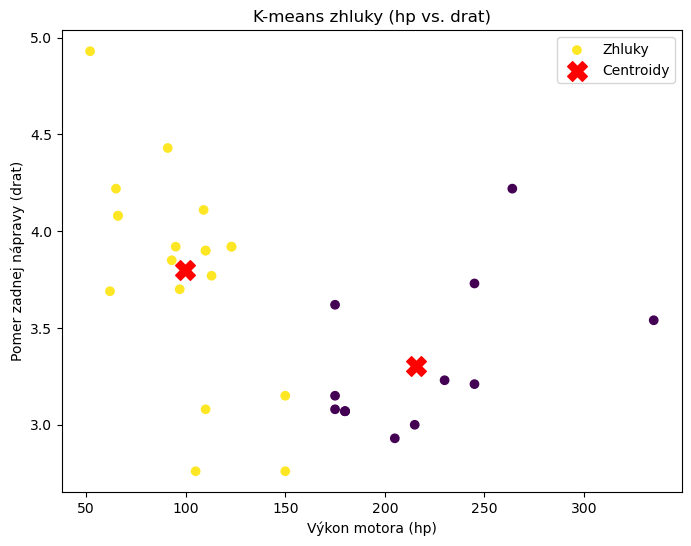

In [4]:
#TVOJ KOD 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Načítanie dát mtcars
mtcars1 = pd.read_csv('mtcars.csv')

# Vybratie stĺpcov hp (výkon motora) a drat (pomer zadnej nápravy)
data = mtcars1[['hp', 'drat']]

# Aplikácia K-means algoritmu s počtom zhlukov 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

# Uloženie výsledkov
kmeans_results1 = kmeans.labels_

# Zobrazenie centroidov a priradení k zhlukom
print("Centroidy zhlukov:")
print(kmeans.cluster_centers_)

print("\nPriradenia k zhlukom:")
print(kmeans_results1)

import pandas as pd

# Create a contingency table comparing 'vs' with cluster assignments
contingency_table = pd.crosstab(mtcars1['vs'], kmeans_results1)

print("Contingency Table (vs vs. Cluster Labels):\n")
print(contingency_table)

# Vytvorenie grafu
plt.figure(figsize=(8,6))

# Scatter plot s atribútmi hp a drat, farebne podľa zhlukov
plt.scatter(data['hp'], data['drat'], c=kmeans_results1, cmap='viridis', label='Zhluky')

# Pridanie centroidov do grafu
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroidy')

plt.xlabel('Výkon motora (hp)')
plt.ylabel('Pomer zadnej nápravy (drat)')
plt.title('K-means zhluky (hp vs. drat)')
plt.legend()
plt.show()


---
## Hierarchické zhlukovanie – úvod

Hierarchické zhlukovanie je **deskriptívna analytická technika**, ktorá hľadá štruktúru v dátach tým, že postupne **spája alebo rozdeľuje objekty** do zhlukov.  
Na rozdiel od K-means nepotrebujeme vopred vedieť, koľko zhlukov chceme – hierarchia sa buduje automaticky a výsledok sa často zobrazuje ako **dendrogram**.

👉 Existujú dva hlavné prístupy:
- **Aglomeratívne zhlukovanie** – začíname s každým objektom v samostatnom zhluku a postupne spájame najbližšie zhluky, až kým nezostane jeden.  
- **Divízne zhlukovanie** – začíname s jedným veľkým zhlukom a postupne ho delíme na menšie.  

---

## 🌳 Praktická implementácia algoritmu Hierarchického zhlukovania

Algoritmus **hierarchického zhlukovania (Hierarchical Clustering)** patrí tiež medzi metódy **učenia bez učiteľa (unsupervised learning)**.  


---

### 1️⃣ Príprava dát

Vytvoríme si menšiu vzorku (`irisSample`) s 40 náhodne vybranými riadkami z datasetu *Iris*, aby bol dendrogram prehľadnejší.

> ```python
> irisSample = iris.sample(40, random_state=25)
> irisSample
> ```

---


In [6]:
iris = sns.load_dataset("iris")
iris.head() 
# Vytvorenie irisSample, ktora bude obsahovat 40 nahodnych riadkov z dat iris
irisSample = iris.sample(40, random_state=25)

irisSample.head()

,sepal_length,sepal_width,petal_length,petal_width,species
28,5.2,3.4,1.4,0.2,setosa
72,6.3,2.5,4.9,1.5,versicolor
70,5.9,3.2,4.8,1.8,versicolor
85,6.0,3.4,4.5,1.6,versicolor
128,6.4,2.8,5.6,2.1,virginica


### 2️⃣ Oddelenie cieľovej premennej

Keďže hierarchické zhlukovanie je tiež **unsupervised learning**, stĺpec `species` si uložíme bokom a odstránime ho z dát, ktoré použijeme na zhlukovanie.

> ```python
> irisSampleSpecies = irisSample['species']
> irisSample.drop(['species'], axis=1, inplace=True)
> ```

---

In [7]:
#kedze su nahodne vybrate riadky, odlozim si aktualne hodnoty Species do samostatnej premennej a dropnem Species pre pouzite v zhlukovani
irisSampleSpecies = irisSample['species']
irisSample.drop(['species'],axis=1,inplace=True)

### 3️⃣ Vytvorenie modelu hierarchického zhlukovania

Vytvoríme model s **3 klastrami** a použijeme parameter `linkage='average'`, ktorý znamená, že vzdialenosť medzi dvoma klastrami sa počíta ako **priemerná vzdialenosť**  medzi všetkými bodmi v jednom a druhom klastri.

> ```python
> from sklearn.cluster import AgglomerativeClustering
> import scipy.cluster.hierarchy as shc
>
> hc = AgglomerativeClustering(n_clusters=3, linkage='average').fit(irisSample)
> ```

---

In [8]:
# Do premennej hc ulozime vysledky hierarchickeho zhlukovania z dat irisSample 
# Algoritmus ma brat vzdialenost medzi zhlukmi ako priemer vzdialenosti bodov v jednom zhluku a bodov v inom zhluku
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'average').fit(irisSample)

### 4️⃣ Vykreslenie dendrogramu

Dendrogram ukazuje, ako sa jednotlivé pozorovania postupne spájajú do väčších zhlukov.  
Pomocou horizontálnej čiary (napr. `y=2`) si môžeme predstaviť, kde „rozrežeme“ hierarchiu,  
aby sme získali požadovaný počet klastrov.

> ```python
> # Vykreslenie zhlukov
> dend = shc.dendrogram(shc.linkage(irisSample, method='average'))
> plt.axhline(y=2, c='k')
> plt.show()
> ```

---

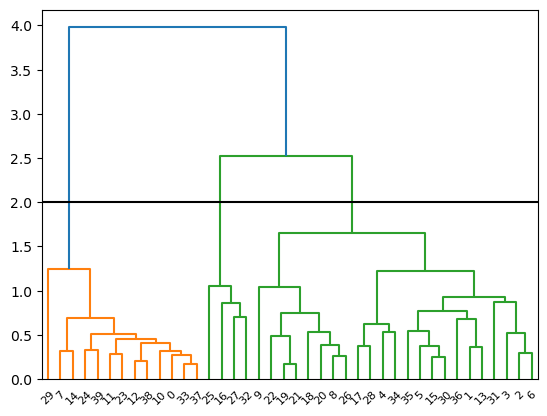

In [9]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(irisSample, method='average'))
plt.axhline(y=2, c='k')
plt.show()

### 5️⃣ Priradenie zhlukov k dátam a porovnanie so skutočnými druhmi

Po vytvorení modelu pridáme do datasetu nový stĺpec `groups`, ktorý obsahuje **ID zhlukov** priradených každému pozorovaniu.  
Následne pomocou **kontingenčnej tabuľky** porovnáme,  ako sa tieto klastre zhodujú so skutočnými triedami kvetov.

> ```python
> # Do dat irisSample pridame stlpec groups, ktory bude obsahovat ID ziskanych zhlukov
> irisSample['groups'] = hc.labels_
> irisSample
>
> # vytvorenie kontingencnej tabulky porovnavajucej hodnoty Species a priradenie k zhluku
> pd.crosstab(irisSampleSpecies, irisSample['groups'])
> ```

---


In [10]:
# Do dat irisSample pridame stlpec groups, ktory bude obsahovat ID ziskanych zhlukov
irisSample['groups'] = hc.labels_
irisSample

# vytvorenie kontingencnej tabulky porovnavajucej hodnoty Species a priradenie k zhluku
pd.crosstab(irisSampleSpecies, irisSample['groups'])


groups,0,1,2
species,,,
setosa,0,13,0
versicolor,16,0,0
virginica,7,0,4


### TO DÁŠ :)

## **Úlohy:**
1. Uložte do premennej `mtcars2` všetky riadky dát `mtcars` a stĺpce `mpg` a `qsec`.  
2. Do premennej `hc2` uložte výsledky hierarchického zhlukovania z dát `mtcars2`.  
   - použite **aglomeratívne zhlukovanie**,  
   - metóda: **average linkage** (priemer vzdialeností).  
3. Vykreslite **dendrogram**, ktorý znázorňuje hierarchické spájanie zhlukov.  
4. Orežte dendrogram na úroveň **troch zhlukov**.  
5. Pridajte do dát `mtcars` nový stĺpec `groups`, ktorý bude obsahovať ID získaných zhlukov.  


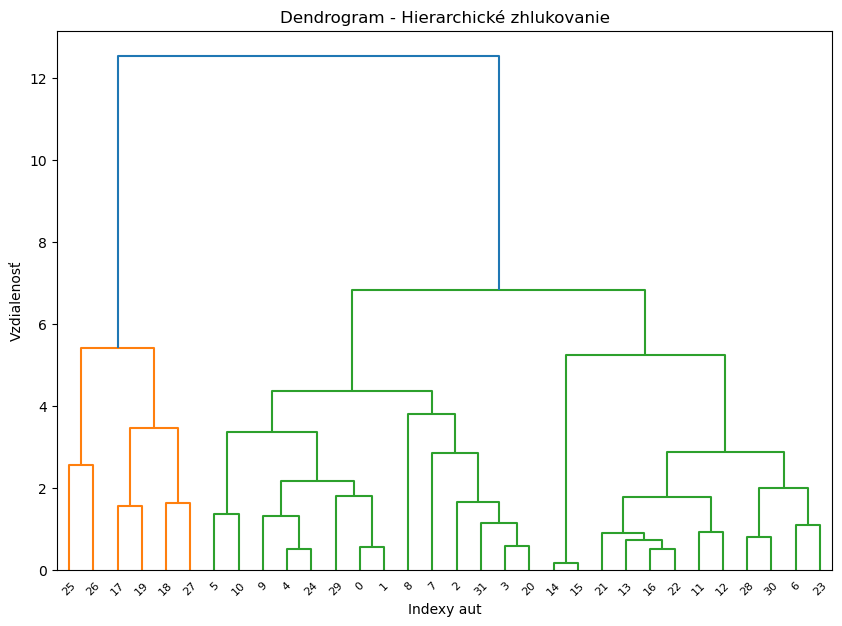

    mpg   qsec  groups
0  21.0  16.46       2
1  21.0  17.02       2
2  22.8  18.61       2
3  21.4  19.44       2
4  18.7  17.02       2


In [5]:
# TVOJ KOD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Načítanie dát mtcars
mtcars1 = pd.read_csv('mtcars.csv')

# Vybratie stĺpcov mpg a qsec
mtcars2 = mtcars1[['mpg', 'qsec']]

# Aglomeratívne zhlukovanie s metodou average linkage
hc2 = linkage(mtcars2, method='average')

# Vykreslenie dendrogramu
plt.figure(figsize=(10, 7))
dendrogram(hc2)
plt.title('Dendrogram - Hierarchické zhlukovanie')
plt.xlabel('Indexy aut')
plt.ylabel('Vzdialenosť')
plt.show()

# Orežeme dendrogram na 3 zhluky
groups = fcluster(hc2, t=3, criterion='maxclust')

# Pridanie stĺpca groups do dát mtcars
mtcars1['groups'] = groups

# Zobrazenie prvých riadkov s pridaným stĺpcom groups
print(mtcars1[['mpg', 'qsec', 'groups']].head())


# Asociačné pravidlá – úvod Apriori, knižnica mlxtend


Asociačné pravidlá patria medzi techniky **deskriptívnej analytiky**, ktoré slúžia na objavovanie zaujímavých vzťahov (asociácií) medzi položkami v dátach.  
Používajú sa najmä v oblasti **market basket analýzy** (analýza nákupných košíkov), ale uplatňujú sa aj v iných oblastiach. 

👉 Jednoducho povedané:  
Asociačné pravidlá nám pomáhajú nájsť vzory typu:  
**„Ak zákazník kúpi X, je veľká pravdepodobnosť, že kúpi aj Y.“**

---

### 🎓 Príklad  
Predstavte si, že analyzujete dáta z nákupov v supermarkete.  
- Zistíte, že **70 % zákazníkov**, ktorí si kúpia *mlieko*, kúpi aj *chlieb*.  
- Alebo že kombinácia *pivo + čipsy* sa často objavuje spolu.  

Takéto vzťahy sa dajú zapísať ako pravidlá:  
- `{mlieko} → {chlieb}`  
- `{pivo, čipsy} → {orechy}`  

Tieto pravidlá pomáhajú obchodníkom napríklad pri **tvorbe akcií**, **plánovaní umiestnenia tovaru** alebo **personalizovaných odporúčaniach**.

#### 📊 Kľúčové metriky
Pri práci s asociačnými pravidlami sa využívajú najmä tieto ukazovatele:  

- **Support (podpora):** ako často sa položky vyskytujú spolu v dátach.  
- **Confidence (dôvera):** pravdepodobnosť, že ak nastane ľavá strana pravidla, nastane aj pravá.  
- **Lift (zvýšenie):** ukazuje, o koľko je pravidlo silnejšie, než by bolo len na základe náhody.
---


## 🛒 Praktická implementácia – Asociačné pravidlá (Apriori algoritmus)

Algoritmus **Apriori** patrí medzi metódy **dátového dolovania (data mining)**, ktoré sa používajú na **hľadanie vzorov správania v transakčných dátach** – napr. v košíkoch zákazníkov (tzv. *market basket analysis*).  

---

### 1️⃣ Základný princíp, knižnica

Asociačné pravidlá majú tvar:

> **IF (antecedent) THEN (consequent)**  
> napr. ak zákazník kúpil *chlieb a maslo*, kúpi aj *mlieko*

Predtým ako začneme si musíte nainštalovať knižnicu **mlxtend** pomocou príkazu:
 - !pip install mlxtend


---

In [11]:
!pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.8 MB/s eta 0:00:00


### 2️⃣ Jednoduchý príklad na malej množine dát

Vytvoríme si malý dataset transakcií a ukážeme si, ako funguje algoritmus Apriori.

> ```python
> from mlxtend.preprocessing import TransactionEncoder
> from mlxtend.frequent_patterns import apriori, association_rules
> import pandas as pd
> import seaborn as sns
> import matplotlib.pyplot as plt
>
> # Jednoduchý dataset (zoznam nákupov)
> transactions = [
>     ...
> ]
>
> # Prevod transakcií do binárnej podoby
> # 👉 každý produkt = 1 ak sa v transakcii vyskytuje, inak 0
> # Tento krok je nutný, pretože Apriori potrebuje binárnu maticu (0/1)
> te = TransactionEncoder()
> te_ary = te.fit(transactions).transform(transactions)
> df = pd.DataFrame(te_ary, columns=te.columns_)
> ```

---

In [130]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Jednoduchý dataset (zoznam nákupov)
transactions = [
    ['chlieb', 'maslo', 'mlieko'],
    ['chlieb', 'vajcia'],
    ['mlieko', 'vajcia', 'maslo'],
    ['chlieb', 'mlieko', 'vajcia', 'maslo'],
    ['chlieb', 'mlieko', 'vajcia'],
    ['maslo', 'džem', 'chlieb'],
    ['mlieko', 'cereálie'],
    ['cereálie', 'mlieko', 'banán'],
    ['chlieb', 'sýr', 'šunka'],
    ['chlieb', 'sýr', 'vajcia'],
    ['mlieko', 'kava', 'cukor'],
    ['kava', 'cukor', 'mlieko', 'maslo'],
    ['cereálie', 'mlieko', 'banán', 'jogurt'],
    ['jogurt', 'banán'],
    ['šunka', 'sýr', 'chlieb', 'maslo'],
    ['vajcia', 'chlieb', 'mlieko', 'maslo'],
    ['mlieko', 'banán', 'jogurt', 'cereálie'],
    ['vajcia', 'šunka', 'sýr'],
    ['chlieb', 'maslo', 'džem', 'kava'],
    ['mlieko', 'cereálie', 'kava']
]

# Prevod transakcií do binárnej podoby
# Každý riadok = jedna transakcia, každý stĺpec = prítomnosť produktu (True/False)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,banán,cereálie,chlieb,cukor,džem,jogurt,kava,maslo,mlieko,sýr,vajcia,šunka
0,False,False,True,False,False,False,False,True,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,True,False,True,False
3,False,False,True,False,False,False,False,True,True,False,True,False
4,False,False,True,False,False,False,False,False,True,False,True,False


### 3️⃣ Vyhľadanie frekventovaných položiek (frequent itemsets)

Pomocou algoritmu **Apriori** nájdeme všetky kombinácie položiek, ktoré sa v dátach vyskytujú s podporou aspoň `0.2` (teda v 20 % transakcií).

> ```python
> frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
> print(frequent_itemsets)
> ```

---

In [131]:
# Výpočet častých množín položiek (min_support = 0.2 znamená, že sa vyskytujú aspoň v 20 % transakcií)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

    support            itemsets
0      0.20             (banán)
1      0.25          (cereálie)
2      0.50            (chlieb)
3      0.20              (kava)
4      0.40             (maslo)
5      0.60            (mlieko)
6      0.20               (sýr)
7      0.35            (vajcia)
8      0.25  (cereálie, mlieko)
9      0.30     (chlieb, maslo)
10     0.20    (chlieb, mlieko)
11     0.25    (chlieb, vajcia)
12     0.25     (maslo, mlieko)
13     0.20    (vajcia, mlieko)


### 4️⃣ Generovanie asociačných pravidiel

Z častých množín vytvoríme **asociačné pravidlá** a vypíšeme tie, ktoré majú **Lift ≥ 1** – teda predstavujú zaujímavé závislosti.

> ```python
> # metric = 'confidence' alebo 'lift'
> # min_threshold = minimálna hranica pre zvolenú metriku
> rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
> print(rules[['support','confidence','lift']])
> ```

--- 

In [132]:
# Generovanie asociačných pravidiel
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['support', 'confidence', 'lift']])


   support  confidence      lift
0     0.25    1.000000  1.666667
1     0.25    0.416667  1.666667
2     0.30    0.600000  1.500000
3     0.30    0.750000  1.500000
4     0.25    0.500000  1.428571
5     0.25    0.714286  1.428571
6     0.25    0.625000  1.041667
7     0.25    0.416667  1.041667


### 5️⃣ Vizualizácia vzťahov medzi pravidlami
Z pravidiel si môžeme vytvoriť prehľadnú **heatmapu**, kde je zobrazená hodnota *confidence* medzi najčastejšími kombináciami.

> ```python
> rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
> rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
>
> top_ants = rules.groupby('antecedents_str')['support'].sum().nlargest(10).index
> top_cons = rules.groupby('consequents_str')['support'].sum().nlargest(10).index
>
> filtered = rules[(rules['antecedents_str'].isin(top_ants)) &
>                  (rules['consequents_str'].isin(top_cons))]
>
> heatmap_data = filtered.pivot(
>     index='antecedents_str', columns='consequents_str', values='confidence')
>
> plt.figure(figsize=(12, 8))
> sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu',
>             linewidths=0.5, cbar_kws={'label': 'Confidence'})
> plt.title('Heatmap of Confidence for Top Association Rules')
> plt.xlabel('Consequents')
> plt.ylabel('Antecedents')
> plt.show()
> 

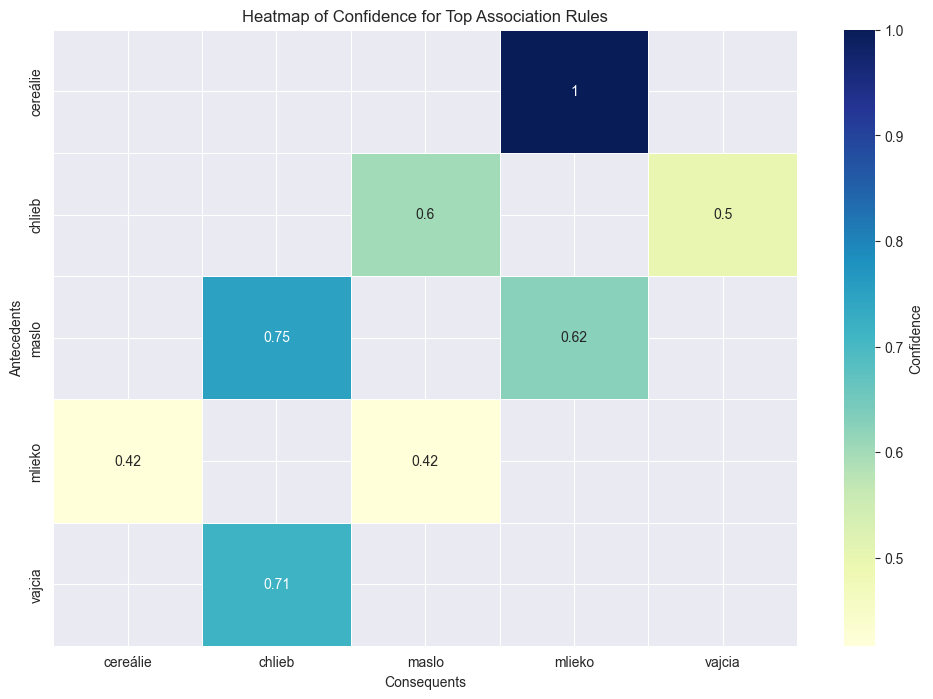

In [133]:
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

top_ants = rules.groupby('antecedents_str')['support'].sum().nlargest(10).index
top_cons = rules.groupby('consequents_str')['support'].sum().nlargest(10).index

filtered = rules[(rules['antecedents_str'].isin(top_ants)) &
                 (rules['consequents_str'].isin(top_cons))]

heatmap_data = filtered.pivot(
    index='antecedents_str', columns='consequents_str', values='confidence')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu',
            linewidths=0.5, cbar_kws={'label': 'Confidence'})
plt.title('Heatmap of Confidence for Top Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

### **Úlohy:**
1. Načítajte dáta `Market_Basket_OneHot.csv`.
   - Dáta obsahujú nákupy zákazníkov zakódované pomocou one-hot encodingu.
   - Načítajte si dataset, zoznámte sa s nim.

2. Pomocou algoritmu **Apriori** vytvorte časté množiny produktov:
   - **minimálna podpora (support):** 0,01.
   - Výsledné množiny **usporiadajte podľa ukazovateľa support** v zostupnom poradí.

3. Na základe častých množín vytvorte **asociačné pravidlá**:
   - **metrika:** confidence
   - **minimálna hodnota confidence:** 0,1.

4. Zobrazte pravidlá s atribútmi:
   - `antecedents`, `consequents`, `support`, `confidence`, `lift`.

5. Výsledné pravidlá **usporiadajte podľa ukazovateľov confidence a lift** v zostupnom poradí.

6. Vykreslite **heatmapu**, ktorá zobrazuje hodnoty `confidence` pre 10 najčastejších antecedentov (Antecendents) a konsekventov (Consequents).


In [ ]:
#TIME TO SHINE

   almonds  antioxydant juice  asparagus  avocado  babies food  bacon  \
0     True               True      False     True        False  False   
1    False              False      False    False        False  False   
2    False              False      False    False        False  False   
3    False              False      False     True        False  False   
4    False              False      False    False        False  False   

   barbecue sauce  black tea  blueberries  body spray  ...  turkey  \
0           False      False        False       False  ...   False   
1           False      False        False       False  ...   False   
2           False      False        False       False  ...   False   
3           False      False        False       False  ...    True   
4           False      False        False       False  ...   False   

   vegetables mix  water spray  white wine  whole weat flour  \
0            True        False       False              True   
1           

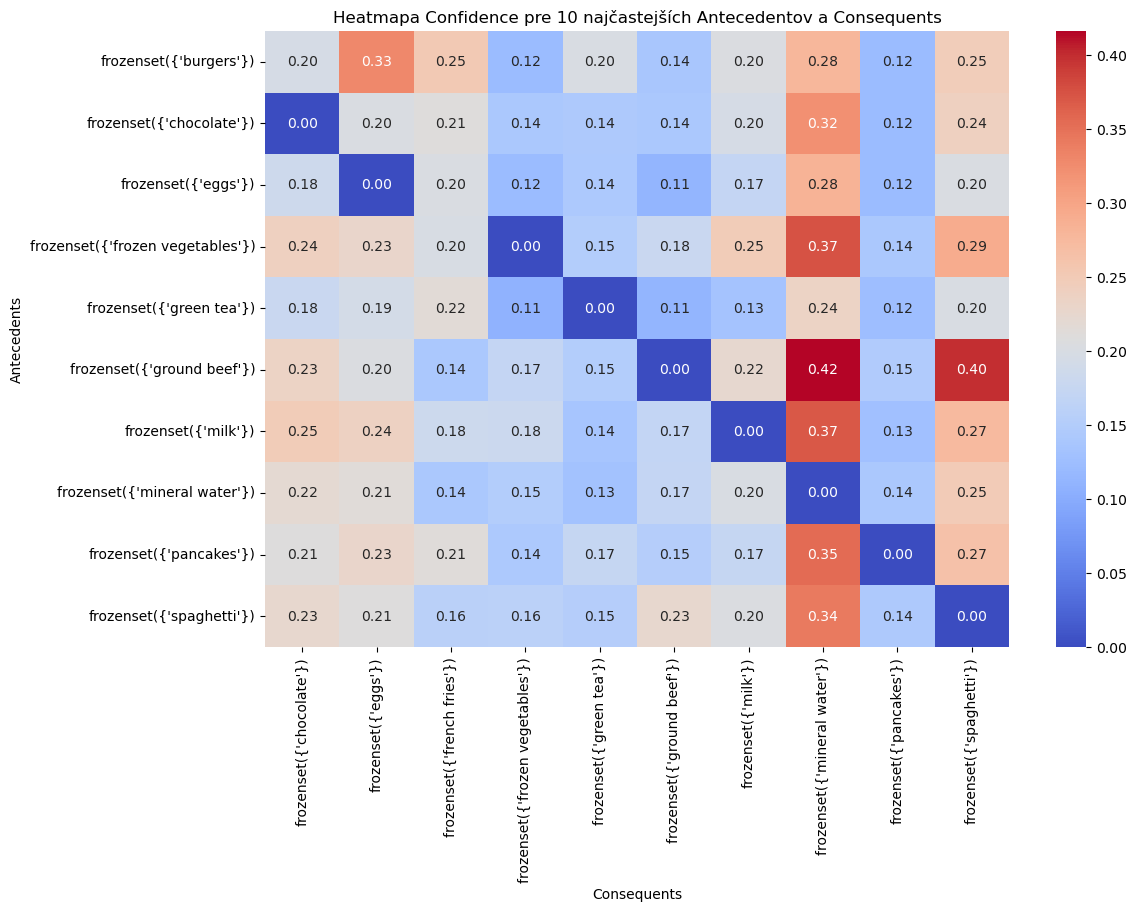

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

# Načítanie dát
df = pd.read_csv('Market_Basket_OneHot.csv')

# Zobrazenie prvých riadkov dát a informácií o datasete
print(df.head())
print(df.info())

# Krok 1: Generovanie častých množín pomocou algoritmu Apriori
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Zobrazenie častých množín zoradených podľa support v zostupnom poradí
print("\nFrequent Itemsets sorted by support:")
print(frequent_itemsets.sort_values(by='support', ascending=False))

# Krok 2: Generovanie asociačných pravidiel s metrikou confidence a minimálnou hodnotou 0.1
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Zobrazenie pravidiel s atribútmi: antecedents, consequents, support, confidence, lift
print("\nAssociation Rules (Antecedents, Consequents, Support, Confidence, Lift):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by=['confidence', 'lift'], ascending=False))

# Krok 3: Vytvorenie heatmapy confidence pre top 10 antecedentov a konsekventov
# Extrahovanie top 10 antecedentov a konsekventov
top_antecedents = rules['antecedents'].value_counts().head(10).index
top_consequents = rules['consequents'].value_counts().head(10).index

# Filtrácia pravidiel s top antecedentmi a konsekventmi
filtered_rules = rules[rules['antecedents'].isin(top_antecedents) & rules['consequents'].isin(top_consequents)]

# Vytvorenie matice confidence pre antecedenty a konsekventy
confidence_matrix = pd.pivot_table(filtered_rules, values='confidence', 
                                   index='antecedents', columns='consequents', 
                                   aggfunc='mean', fill_value=0)

# Vykreslenie heatmapy
plt.figure(figsize=(12, 8))
sns.heatmap(confidence_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmapa Confidence pre 10 najčastejších Antecedentov a Consequents')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()
